<a href="https://colab.research.google.com/github/Albieri151/Ejercicios-Data-Science-Petroleo/blob/main/Alana_Albieri_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Artificial Intelligence in Energy Engineering
### Albieri M. Alaña R., Estudiante Ing Informatica URBE
### 2026
***
## Week 1 Workbook
***

##**1.	Define and describe the following:**

###**a.	Data resolution**

El concepto de Data Resolution o Resolucion de datos es un tema fundamental en la ciencia de datos, se centra en el nivel de detalle para evaluar y estudiar un fenomeno x, la misma tiene centro en dar detalles de los fenomenos estudiados, podriamos dividirle a su vez en alta o baja, a mayor resolution tenemos un mayor desglose en las variables estudiadas de un fenomeno mientras que a su vez a menor, es mas general y menos informativa. Imagina que tomamos en torno a un espacio n, muestras cada 15 metros mientras en otro entorno tomamos muestras cada metro, la primera presenta una baja resolucion en comparacion al otro ejemplo.

###**b.	Why is a good workflow documentation essential**

Este mas que un tema tecnico es conocimiento general indispensable al momento de desarrollar cualquier tipo de proyecto. El mismo hace referencia a la necesidad de documentar procesos mostrando el paso a paso del desarrollo de cada proyecto, mostrar el porque de cada paso, descripciones de variables o punto tomados en cuenta. Es fundamental para poder darle continuidad a cualquier proyecto, imagina el caso que desarrollas e implementas una arquitectura medallion para procesar datos que alimentaran nuestros modelos, el ingeniero a cargo por mala practica realizo el desarrollo y a medio desarrollo cambio de trabajo porque le ofrecieron un mejor cargo y sueldo que el de su actual empresa, el mismo acepta y deja el proyecto en desarrollo sin documentacion, la empresa a cargo asigna un nuevo ingeniero ya que necesita ese proyecto en produccion pero el nuevo ingeniero al tomar el proyecto se atrasa un mes para poder comprender el porque se diseño de esa forma, porque escogio una herramienta sobre otra, que bondades trae cada tecnologia escogida, porque se implemento n logica y cantidad de retrasos adicionales que esto conlleva. Todos estos problemas se pudieron ahorrar al dejar un workflow que permitiera la reproducibilidad del proyecto ademas de la explicacion del porque de todo.

###**c.	Hard data vs. Soft data**

Al hablar de Hard Data hace referencia a informacion directa, tuvimos un incremento de un 20% de robos en Maracaibo, en una finca tenemos alta rotacion de personal con un 30% trimestralmente. Es informacion directa sin embargo poco informativa. La Soft Data muchas veces pensada como informacion blanda o poco relevante ( extremadamente equivocado) hace referencia a metricas que explican el porque de los insight mostrados como Hard Data.

###**d.	Modeling for discomfort**

Este concepto lleva la contraria al modelado tradicional, un ejemplo de lo tradicional podria ser que tomamos un modelo que nos dice cuando fallara un pozo, te sientes comodo con esta seguridad brindada, en contraparte este modelo nos brinda insight del estilo esto fallara, tenemos actualmente un 80% de incertidumbre partiendo de que tenemos pocos datos. La idea central es exponer los peores escenarios para despues poder atacarles.

###**e. Frequentist probability vs. Bayesian probability**

La probabilidad frecuentista podriamos decir que es la mas famosa, se basa en la frecuencia como la media calculando el cociente entre casos positivos entre el total. Es mas directa sin embargo carece de la habilidad adaptativa a la realidad en tiempo real en cambio su contraparte si es capaz de adaptarse a su entorno calculando la probabilidad priorio para despues obtener la probabilidad a posteriori.

##**2. Well Log Analysis**

###**2.1 Carga de datos: Cargaremos un registro de pozo desde un repositorio publico a fin de garantizar la disponibilidad de los datos para ejercicios. Instalamos el paquete lasio, leeremos el archivo para convertirlo en un dataframe de pandas y eliminando los valores nulos (NaN).**

In [65]:
!pip install lasio

In [66]:
import lasio as ls
import numpy as np
import matplotlib.pyplot as plt

well_log = ls.read("https://raw.githubusercontent.com/Albieri151/Ejercicios-Data-Science-Petroleo/main/KG1.LAS").df()
df_well_log = well_log.dropna()

###**2.2 Estadísticas descriptivas: Encontraremos la media, el mínimo, el máximo, el conteo de valores nulos y otras estadísticas relevantes para cada propiedad del registro.**

In [67]:
df_well_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19871 entries, 2626.5 to 12582.0
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SP       19871 non-null  float64
 1   GR       19871 non-null  float64
 2   CALI     19871 non-null  float64
 3   BITSIZE  19871 non-null  float64
 4   LL8      19871 non-null  float64
 5   ILM      19871 non-null  float64
 6   ILD      19871 non-null  float64
 7   RHOB     19871 non-null  float64
 8   NPHI     19871 non-null  float64
 9   DT       19871 non-null  float64
 10  MUDWGT   19871 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


In [68]:
df_well_log.describe().T

,count,mean,std,min,25%,50%,75%,max
SP,19871.0,-7.228040,11.394111,-59.46976,-6.695355,-2.75949,-1.153555,6.67082
GR,19871.0,59.965736,20.159385,9.02010,53.416550,63.73470,71.269200,200.06860
CALI,19871.0,13.987712,2.344219,6.09080,12.595550,14.18640,15.685350,17.83940
BITSIZE,19871.0,10.784045,1.829884,8.50000,8.500000,12.25000,12.250000,12.25000
LL8,19871.0,126.950596,353.376916,2.60470,7.837750,9.62000,21.781150,2204.85229
ILM,19871.0,197.162363,532.839099,1.66660,6.268950,8.09720,17.510700,2168.12036
ILD,19871.0,185.148274,509.976871,1.89760,6.416900,8.28610,19.252450,2309.16040
RHOB,19871.0,2.419445,0.213644,1.44310,2.324500,2.46110,2.549100,3.01570
NPHI,19871.0,26.055947,15.211199,-3.60250,13.265000,31.18400,36.533300,62.69810
DT,19871.0,84.601498,12.349984,57.93940,76.795400,85.83970,93.134650,127.73290


###**2.3 	Calcule la concentración volumétrica del registro (V_sh or V_clay). Use la formula**
$$
V_{sh} = \frac{GR - GR_{min}}{GR_{max} - GR_{min}}
$$

In [69]:
v_sh = (df_well_log['GR'] - df_well_log['GR'].min()) / (df_well_log['GR'].max() - df_well_log['GR'].min())
df_well_log_copy = df_well_log.copy()
df_well_log_copy['V_sh'] = v_sh
df_well_log_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
SP,19871.0,-7.228040,11.394111,-59.46976,-6.695355,-2.759490,-1.153555,6.67082
GR,19871.0,59.965736,20.159385,9.02010,53.416550,63.734700,71.269200,200.06860
CALI,19871.0,13.987712,2.344219,6.09080,12.595550,14.186400,15.685350,17.83940
BITSIZE,19871.0,10.784045,1.829884,8.50000,8.500000,12.250000,12.250000,12.25000
LL8,19871.0,126.950596,353.376916,2.60470,7.837750,9.620000,21.781150,2204.85229
ILM,19871.0,197.162363,532.839099,1.66660,6.268950,8.097200,17.510700,2168.12036
ILD,19871.0,185.148274,509.976871,1.89760,6.416900,8.286100,19.252450,2309.16040
RHOB,19871.0,2.419445,0.213644,1.44310,2.324500,2.461100,2.549100,3.01570
NPHI,19871.0,26.055947,15.211199,-3.60250,13.265000,31.184000,36.533300,62.69810
DT,19871.0,84.601498,12.349984,57.93940,76.795400,85.839700,93.134650,127.73290


###**2.4 Find the pure shale – this is where the GR log peaks. Identify the pure shale properties: GR_sh, RHOB_sh, NPHI_sh.**

$$
\phi_D = \frac{2.65 - RHOB}{2.65 - 1}
$$
$$
\phi_{DC} = \frac{\phi_D - V_{sh} \cdot \phi_{Dsh}} {1 - V_{sh}}
$$
$$
\phi_{Nc} = \frac{\phi_N - C_{sh} \cdot \phi_{Nsh}}  {1 - C_{sh}}
$$
$$
\phi = \sqrt{\frac{\phi_{DC}^2 + \phi_{NC}^2}{2}}
$$

In [70]:
# Identificación de propiedades de arcilla pura (Punto 3)
# Buscamos el valor máximo de Gamma Ray (GR) para identificar la zona de arcilla pura
idx_shale = df_well_log_copy['GR'].idxmax()

RHOB_sh = df_well_log_copy.loc[idx_shale, 'RHOB']
NPHI_sh = df_well_log_copy.loc[idx_shale, 'NPHI']

# A. Porosidad de Densidad (phi_D)
df_well_log_copy['phi_D'] = (2.65 - df_well_log_copy['RHOB']) / (2.65 - 1.0)

# B. Porosidad de Densidad Corregida (phi_DC)
# Primero necesitamos la porosidad de densidad de la arcilla pura (phi_Dsh)
phi_Dsh = (2.65 - RHOB_sh) / (2.65 - 1.0)
df_well_log_copy['phi_DC'] = (df_well_log_copy['phi_D'] - (df_well_log_copy['V_sh'] * phi_Dsh)) / (1 - df_well_log_copy['V_sh'])

# C. Porosidad Neutrón Corregida (phi_Nc)
# Formula 3
df_well_log_copy['phi_Nc'] = (df_well_log_copy['NPHI'] - df_well_log_copy['V_sh'] * NPHI_sh) / (1 - df_well_log_copy['V_sh'])

# D. Porosidad Total Combinada (phi)
# Formula 4
df_well_log_copy['phi_total'] = np.sqrt((df_well_log_copy['phi_DC']**2 + df_well_log_copy['phi_Nc']**2) / 2)

df_well_log_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
SP,19871.0,-7.228040,11.394111,-59.469760,-6.695355,-2.759490,-1.153555,6.670820
GR,19871.0,59.965736,20.159385,9.020100,53.416550,63.734700,71.269200,200.068600
CALI,19871.0,13.987712,2.344219,6.090800,12.595550,14.186400,15.685350,17.839400
BITSIZE,19871.0,10.784045,1.829884,8.500000,8.500000,12.250000,12.250000,12.250000
LL8,19871.0,126.950596,353.376916,2.604700,7.837750,9.620000,21.781150,2204.852290
ILM,19871.0,197.162363,532.839099,1.666600,6.268950,8.097200,17.510700,2168.120360
ILD,19871.0,185.148274,509.976871,1.897600,6.416900,8.286100,19.252450,2309.160400
RHOB,19871.0,2.419445,0.213644,1.443100,2.324500,2.461100,2.549100,3.015700
NPHI,19871.0,26.055947,15.211199,-3.602500,13.265000,31.184000,36.533300,62.698100
DT,19871.0,84.601498,12.349984,57.939400,76.795400,85.839700,93.134650,127.732900


###**2.5 Visualiza la suite de registros. Grafica los registros de un pozo de tu elección. Muestra 4 pistas: (1) rayos gamma [50-200 o similar] y V_sh [0-1], (2) RHOB [1.65-2.65] y NPHI [0-0.6], (3) Resistividad superficial, media, profunda [0.2-2000 o similar, en escala logarítmica], (4) otros registros interesantes. Agrega etiquetas a los ejes. Asegúrate de que la profundidad aumente hacia abajo, Sugerencia: ‘ax.invert_yaxis()’. Comenta sobre posibles tipos de roca, capas, ambientes deposicionales u otro análisis.**

##

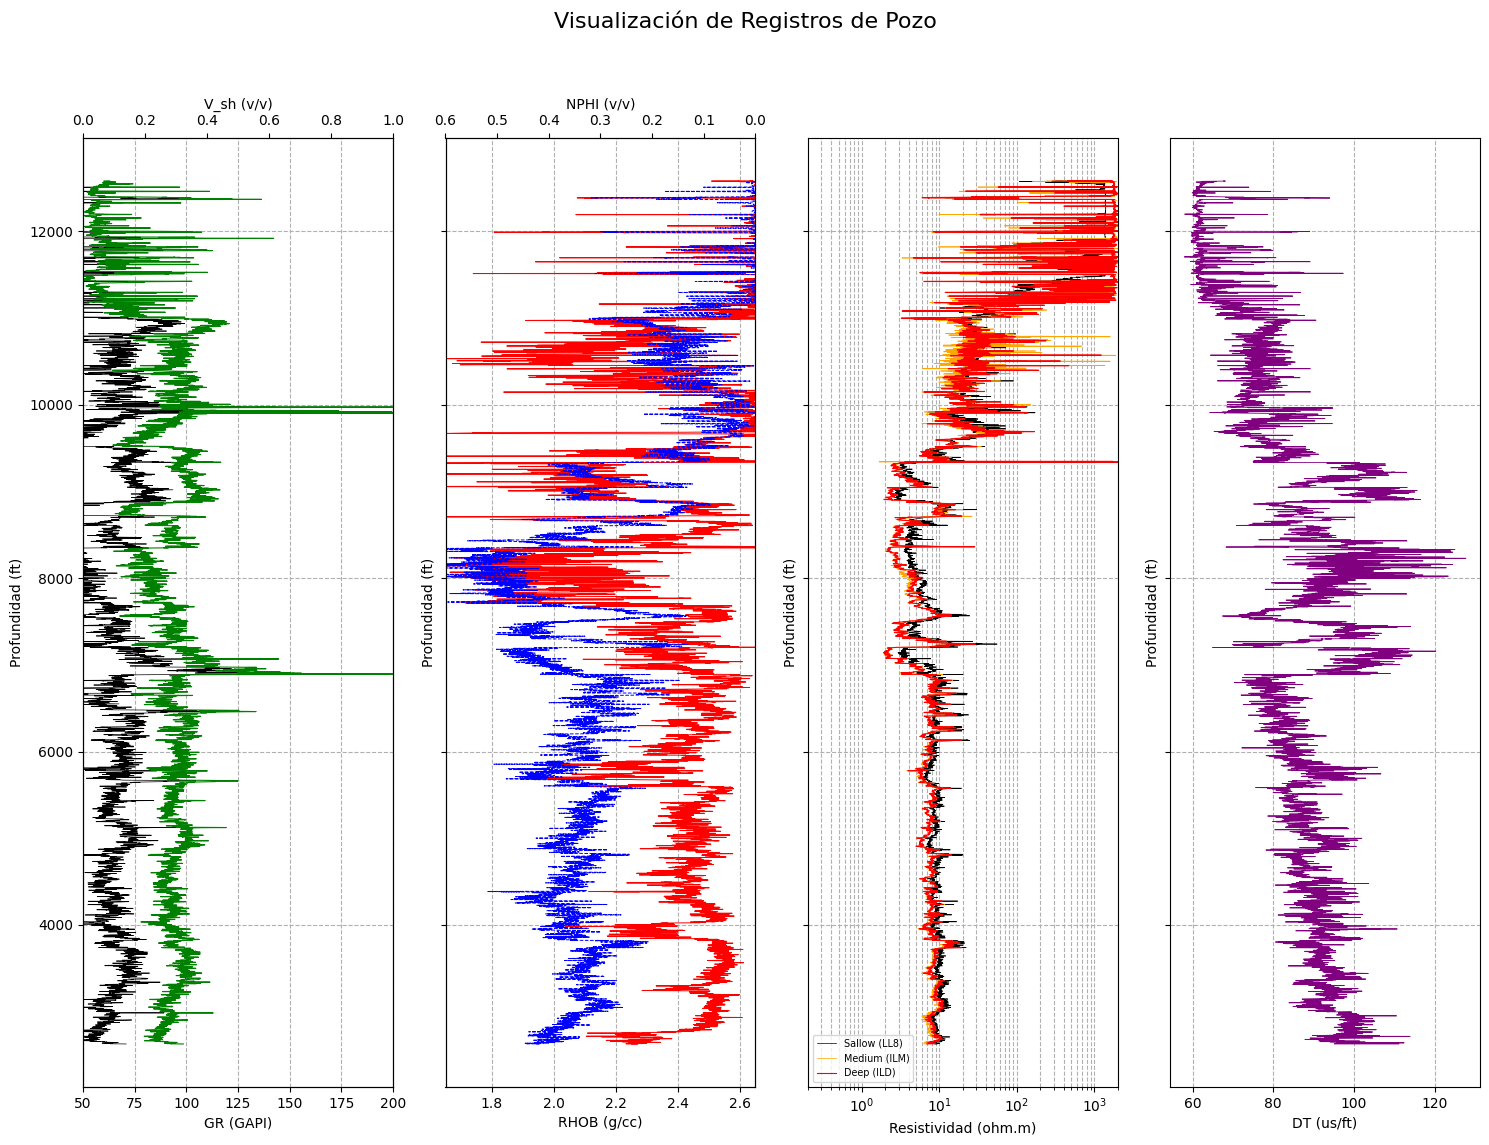

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 12), sharey=True)
fig.suptitle(f"Visualización de Registros de Pozo", fontsize=16)

# PISTA 1: Rayos Gamma (GR) y Volumen de Arcilla (Vsh)
ax[0].plot(df_well_log_copy['GR'], df_well_log_copy.index, color='black', lw=0.5, label='GR')
ax[0].set_xlim(50, 200)
ax[0].set_xlabel('GR (GAPI)')
ax[0].grid(True, linestyle='--')

ax1b = ax[0].twiny() # Eje compartido para Vsh
ax1b.plot(df_well_log_copy['V_sh'], df_well_log_copy.index, color='green', lw=0.8, label='V_sh')
ax1b.set_xlim(0, 1)
ax1b.set_xlabel('V_sh (v/v)')
ax1b.spines['top'].set_position(('outward', 0))

# PISTA 2: Densidad (RHOB) y Neutrón (NPHI)
ax[1].plot(df_well_log_copy['RHOB'], df_well_log_copy.index, color='red', lw=0.7, label='RHOB')
ax[1].set_xlim(1.65, 2.65)
ax[1].set_xlabel('RHOB (g/cc)')
ax[1].grid(True, linestyle='--')

ax2b = ax[1].twiny()
# Dividimos NPHI por 100 ya que el archivo está en % pero la escala pedida es 0-0.6
ax2b.plot(df_well_log_copy['NPHI']/100, df_well_log_copy.index, color='blue', lw=0.7, ls='--', label='NPHI')
ax2b.set_xlim(0.6, 0) # La escala neutrón se suele invertir
ax2b.set_xlabel('NPHI (v/v)')

# PISTA 3: Resistividades (Escala Logarítmica)
ax[2].semilogx(df_well_log_copy['LL8'], df_well_log_copy.index, color='black', lw=0.5, label='Sallow (LL8)')
ax[2].semilogx(df_well_log_copy['ILM'], df_well_log_copy.index, color='orange', lw=0.5, label='Medium (ILM)')
ax[2].semilogx(df_well_log_copy['ILD'], df_well_log_copy.index, color='red', lw=0.8, label='Deep (ILD)')
ax[2].set_xlim(0.2, 2000)
ax[2].set_xlabel('Resistividad (ohm.m)')
ax[2].grid(True, which='both', linestyle='--')
ax[2].legend(loc='lower left', fontsize='x-small')

# PISTA 4: Registro Sónico (DT)
ax[3].plot(df_well_log_copy['DT'], df_well_log_copy.index, color='purple', lw=0.6)
ax[3].set_xlabel('DT (us/ft)')
ax[3].grid(True, linestyle='--')

# Ajustes comunes
for a in ax:
    a.invert_yaxis() # La profundidad aumenta hacia abajo
    a.set_ylabel('Profundidad (ft)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

KeyError: 'Vsh'

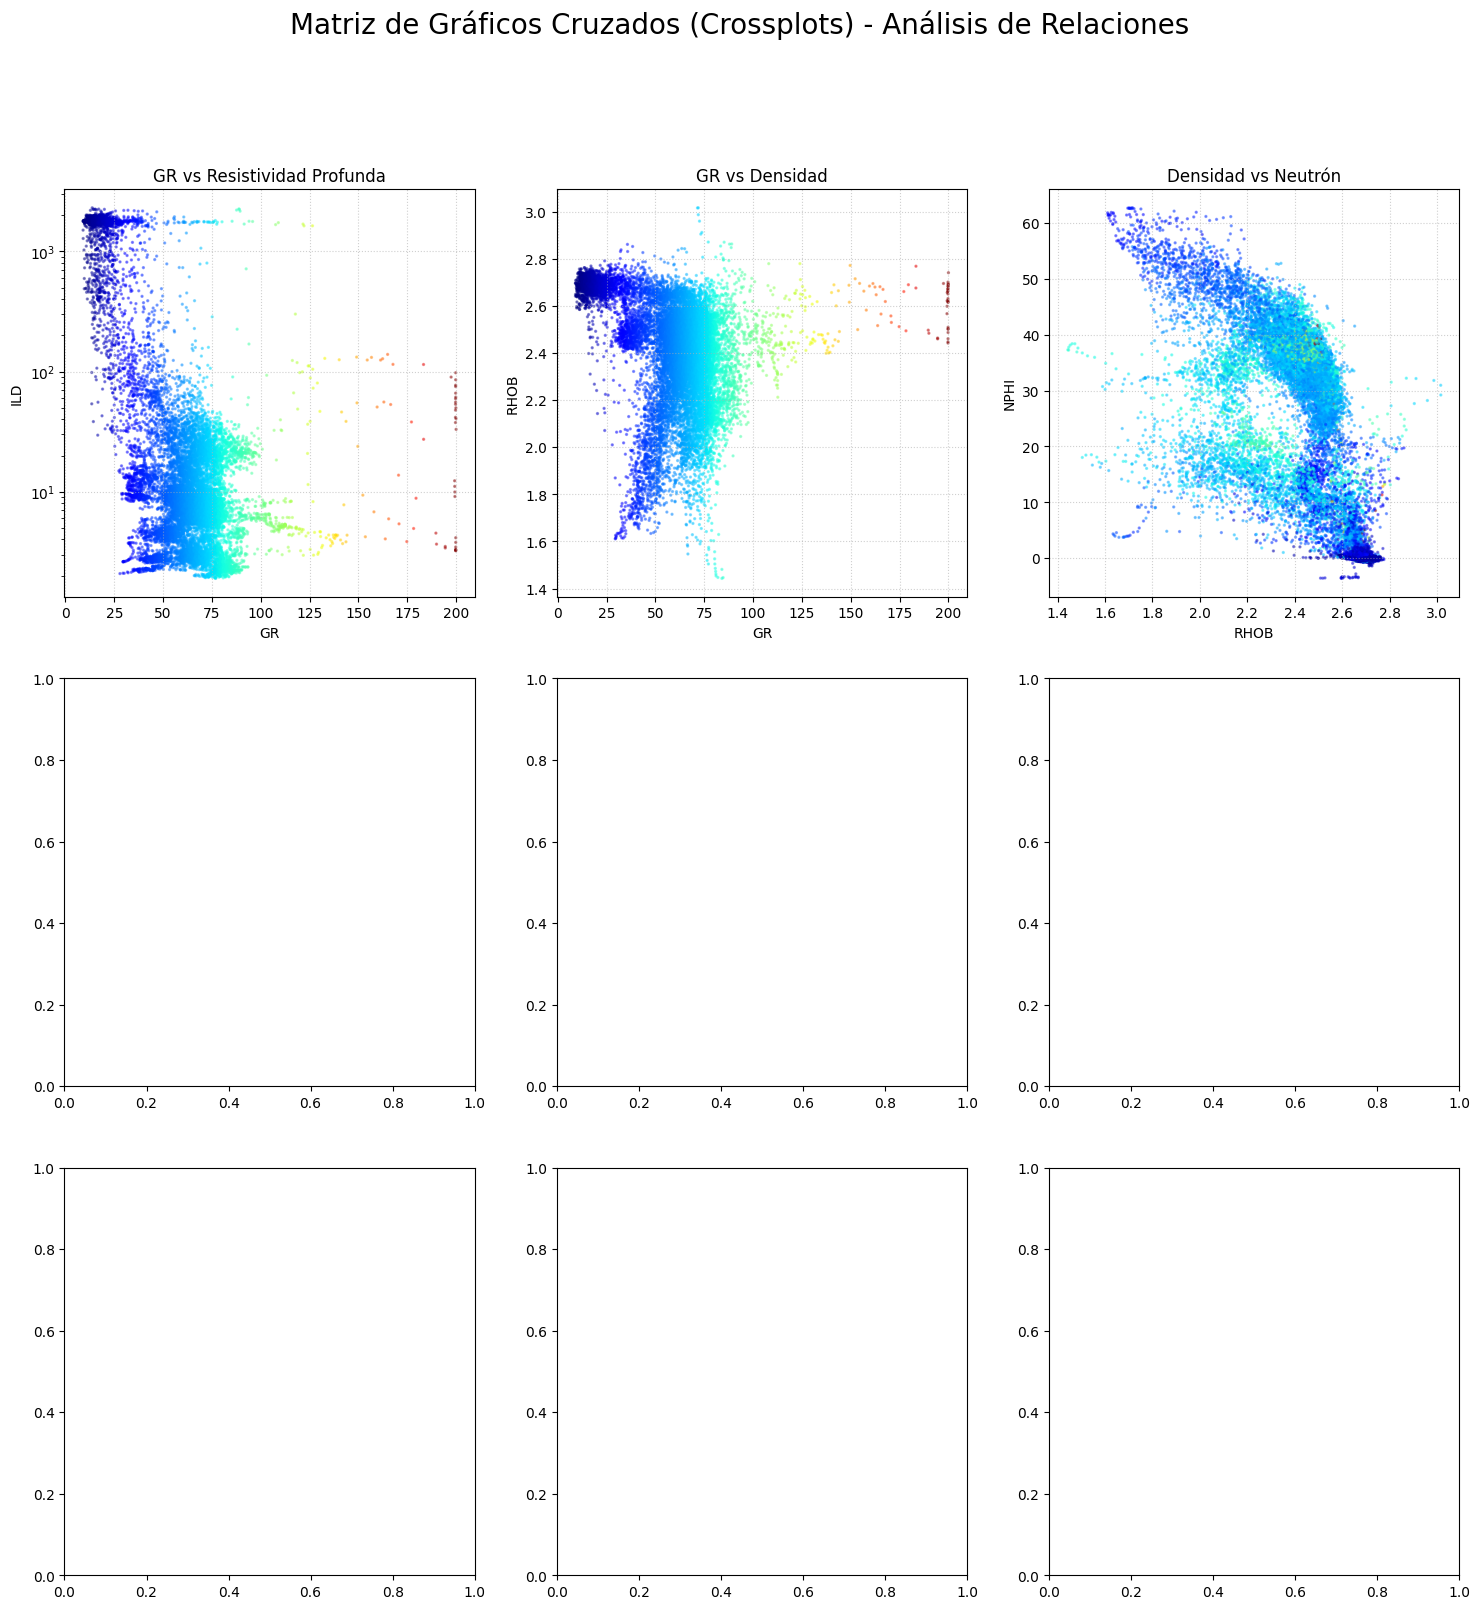

In [77]:
# Creamos una matriz de 3x3 subgráficos
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Matriz de Gráficos Cruzados (Crossplots) - Análisis de Relaciones', fontsize=20)

# Definimos las combinaciones de propiedades a graficar
# Formato: (Eje X, Eje Y, Título, LogX?, LogY?)
plot_configs = [
    ('GR', 'ILD', 'GR vs Resistividad Profunda', False, True),
    ('GR', 'RHOB', 'GR vs Densidad', False, False),
    ('RHOB', 'NPHI', 'Densidad vs Neutrón', False, False),
    ('Vsh', 'phi_T', 'Vol. Arcilla vs Porosidad Total', False, False),
    ('phi_T', 'k', 'Porosidad vs Permeabilidad', False, True),
    ('ILD', 'phi_T', 'Resistividad vs Porosidad', True, False),
    ('GR', 'DT', 'GR vs Sónico', False, False),
    ('RHOB', 'phi_T', 'Densidad vs Porosidad', False, False),
    ('Sw', 'phi_T', 'Saturación vs Porosidad', False, False)
]

for i, (x_col, y_col, title, log_x, log_y) in enumerate(plot_configs):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    # Graficamos usando un scatter plot con color basado en Vsh
    sc = ax.scatter(df_well_log_copy[x_col], df_well_log_copy[y_col], c=df_well_log_copy['V_sh'], cmap='jet', alpha=0.4, s=2)

    ax.set_title(title, fontsize=12)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True, linestyle=':', alpha=0.6)

    if log_x: ax.set_xscale('log')
    if log_y: ax.set_yscale('log')

# Añadimos una barra de color común para representar Vsh
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(sc, cax=cbar_ax, label='Volumen de Arcilla (V_sh)')

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
plt.show()